In [1]:
import pandas as pd
df= pd.read_csv("Occupancy_Estimation.csv")

In [2]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
from sklearn.metrics import accuracy_score

In [7]:
x = df[['S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2']]
y= df['Room_Occupancy_Count']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
y_pred = lda.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8667324777887463


In [16]:
X_lda = lda.transform(x)

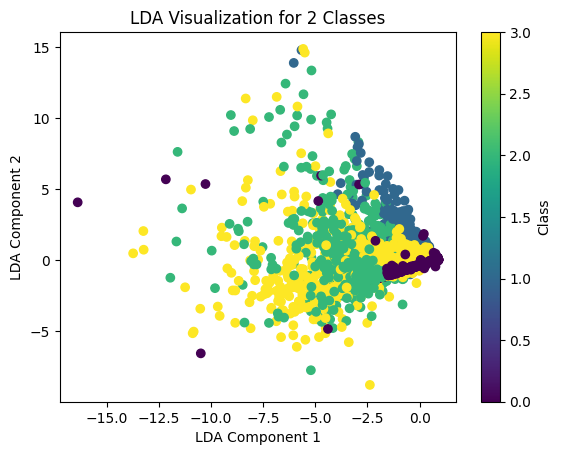

In [23]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)  # Scatter plot of LDA components
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization for 2 Classes')
plt.colorbar(label='Class')  # Add a colorbar to show class mapping
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1588,    0,    1,   30],
       [  80,   22,    1,    0],
       [  43,   11,   65,   45],
       [  42,    0,   17,   81]], dtype=int64)

In [32]:
report = classification_report(y_test, y_pred)

In [34]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1619
           1       0.67      0.21      0.32       103
           2       0.77      0.40      0.52       164
           3       0.52      0.58      0.55       140

    accuracy                           0.87      2026
   macro avg       0.72      0.54      0.58      2026
weighted avg       0.86      0.87      0.85      2026

